# sequana_coverage test case example (fungus) 

This notebook creates the BED file S_pombe.filtered.bed provided in 
- https://github.com/sequana/resources/tree/master/coverage and
- https://www.synapse.org/#!Synapse:syn10638358/wiki/465309

It also show the ability of sequana_coverage tool to handle multi-chromosome input data set

**WARNING**: you need an account on synapse to get the FastQ files.

You can skip the steps that build the BED file and download it directly from github:

```
wget //github.com/sequana/resources/raw/master/coverage/S_pombe.filtered.bed.bz2
bunzip2 S_Pombe.filtered.bed
```

Otherwise, we first download 2 FastQ files from Synapse, its reference genome and its genbank annotation. Then, we use   BWA to map reads into a BAM file. The BAM file itself is converted to a BED, which is going to be one input file to our analysis. Finally, we use the coverage tool from Sequana project (i) with the standalone (sequana_coverage) and (ii) the Python library to analyse the BED file.

Versions used:
- sequana 0.6.4
- bwa mem 0.7.15
- bedtools 2.26.0
- samtools 1.5
- synapseclient 1.7.2

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [10,7]

Populating the interactive namespace from numpy and matplotlib


# Download FastQ files (1.6Gb)

In [2]:
import synapseclient
l = synapseclient.login()
l.get("syn10641621", downloadLocation=".", ifcollision="overwrite.local")
l.get("syn10641896", downloadLocation=".", ifcollision="overwrite.local")

Welcome, Thomas Cokelaer!



File(entityType='org.sagebionetworks.repo.model.FileEntity', concreteType='org.sagebionetworks.repo.model.FileEntity', name='M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz', dataFileHandleId='17867278', id='syn10641896', _file_handle={'createdBy': '375805', 'bucketName': 'proddata.sagebase.org', 'contentSize': 814044782, 'storageLocationId': 1, 'etag': '4cf817a3-4081-4c79-b3fa-081a0f1488a9', 'externalURL': None, 'key': '375805/79e49536-46fa-4963-935c-7e3300e821cb/M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz', 'id': '17867278', 'contentType': 'binary/octet-stream', 'contentMd5': '42957c3a1d80c033b3732b866b9a5b33', 'fileName': 'M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz', 'concreteType': 'org.sagebionetworks.repo.model.file.S3FileHandle', 'createdOn': '2017-09-07T20:10:34.000Z'}, modifiedBy='375805', path='/home/cokelaer/Work/github/sequana_resources/coverage/fungus/M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz', cacheDir='/home/cokelaer/Work/github/sequana

## Download reference and annotation files

In [5]:
!sequana_coverage --download-reference CU329670 
!sequana_coverage --download-reference CU329671
!sequana_coverage --download-reference CU329672 
!sequana_coverage --download-reference X54421 

INFO    [sequana]:  Downloading reference CU329670 from ENA

INFO    [sequana]:  Downloading reference CU329671 from ENA

INFO    [sequana]:  Downloading reference CU329672 from ENA

INFO    [sequana]:  Downloading reference X54421 from ENA



In [4]:
!sequana_coverage --download-genbank CU329670
!sequana_coverage --download-genbank CU329671
!sequana_coverage --download-genbank CU329672
!sequana_coverage --download-genbank X54421

INFO    [sequana]:  Downloading genbank None from ENA

INFO    [sequana]:  Downloading genbank None from ENA

INFO    [sequana]:  Downloading genbank None from ENA

INFO    [sequana]:  Downloading genbank None from ENA



In [7]:
!cat CU*gbk  X*gbk > S_pombe.gbk
!cat CU*.fa X*.fa> S_pombe.fa

The Reference must be altered to rename the header so that they 
agree with the genbank 

In [8]:
%%time
files = ['CU329670.fa', "CU329671.fa", "CU329672.fa", "X54421.fa"]
with open("S_pombe.fa", "w") as fout:
    for filename in files:
        with open(filename, "r") as fin  :
            for line in fin.readlines():
                if line.startswith(">"):
                    start, end = line.split(None, 1)
                    accession = start[1:].rsplit("|", 1)[1]
                    line = ">" + accession + " " + end
                fout.write(line)

CPU times: user 93.6 ms, sys: 24.2 ms, total: 118 ms
Wall time: 117 ms


In [9]:
# The mapping to obtain the sorted BAM file (uses BWA behing the scene)
!time sequana_mapping \
    --file1 M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R1_001.fastq.gz \
    --file2 M14-19_J29_01_TAAGGCGA-TATCCTCT_L002_R2_001.fastq.gz \
    --reference S_pombe.fa --thread 4



Theoretical Depth of Coverage : 321.5617193567531
[bwa_index] Pack FASTA... 0.08 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 6.26 seconds elapse.
[bwa_index] Update BWT... 0.07 sec
[bwa_index] Pack forward-only FASTA... 0.05 sec
[bwa_index] Construct SA from BWT and Occ... 2.66 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index S_pombe.fa
[main] Real time: 9.563 sec; CPU: 9.127 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 400000 sequences (40000000 bp)...
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (152, 179061, 18, 137)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (90, 140, 226)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 498)
[M::mem_pestat] mean and std.dev: (160.36, 94.83)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 634)
[M::mem_pestat] analyz

[M::mem_process_seqs] Processed 400000 reads in 23.142 CPU sec, 5.826 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (142, 178941, 15, 141)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (99, 158, 285)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 657)
[M::mem_pestat] mean and std.dev: (189.31, 126.22)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 843)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (149, 213, 301)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 605)
[M::mem_pestat] mean and std.dev: (232.08, 111.07)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 757)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (100, 158, 3

[M::mem_process_seqs] Processed 400000 reads in 22.778 CPU sec, 5.727 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (141, 178897, 12, 120)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (87, 146, 245)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (167.24, 100.37)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 719)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (150, 215, 303)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 609)
[M::mem_pestat] mean and std.dev: (233.80, 111.66)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 762)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (216, 448, 4

[M::mem_process_seqs] Processed 400000 reads in 26.203 CPU sec, 6.610 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (146, 179067, 14, 117)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (93, 143, 220)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 474)
[M::mem_pestat] mean and std.dev: (163.01, 96.85)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 601)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (150, 214, 303)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 609)
[M::mem_pestat] mean and std.dev: (233.26, 111.83)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 762)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (90, 191, 284

[M::mem_process_seqs] Processed 400000 reads in 28.371 CPU sec, 7.152 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (127, 179676, 14, 127)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (96, 155, 251)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 561)
[M::mem_pestat] mean and std.dev: (176.52, 107.31)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 716)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (147, 210, 295)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 591)
[M::mem_pestat] mean and std.dev: (228.20, 108.57)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 739)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (68, 234, 24

[M::mem_process_seqs] Processed 400000 reads in 27.158 CPU sec, 6.860 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (147, 178931, 19, 146)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (102, 174, 273)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 615)
[M::mem_pestat] mean and std.dev: (192.13, 122.56)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 786)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (151, 217, 306)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 616)
[M::mem_pestat] mean and std.dev: (235.60, 113.33)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 771)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (147, 267, 

[M::mem_process_seqs] Processed 400000 reads in 28.968 CPU sec, 7.296 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (156, 179319, 12, 123)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (87, 131, 203)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 435)
[M::mem_pestat] mean and std.dev: (143.16, 76.95)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 551)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (147, 210, 295)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 591)
[M::mem_pestat] mean and std.dev: (228.15, 108.49)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 739)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (122, 242, 42

[M::mem_process_seqs] Processed 400000 reads in 24.081 CPU sec, 6.054 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (150, 178975, 10, 102)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (110, 163, 245)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 515)
[M::mem_pestat] mean and std.dev: (175.51, 92.36)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 650)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (152, 217, 307)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 617)
[M::mem_pestat] mean and std.dev: (236.42, 113.56)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 772)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (185, 343, 6

[M::mem_process_seqs] Processed 400000 reads in 25.587 CPU sec, 6.430 real sec
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (139, 179271, 17, 113)
[M::mem_pestat] analyzing insert size distribution for orientation FF...
[M::mem_pestat] (25, 50, 75) percentile: (94, 146, 229)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 499)
[M::mem_pestat] mean and std.dev: (161.79, 89.54)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 634)
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (149, 213, 299)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (1, 599)
[M::mem_pestat] mean and std.dev: (231.10, 110.11)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 749)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (168, 433, 38

In [11]:
# Build the BED file (unfiltered)
! time samtools depth -d 30000 S_pombe.fa.sorted.bam -aa > S_pombe.bed



real	2m13.383s
user	2m12.247s
sys	0m0.753s


# We can add an extra column with mapped reads of low quality being removed (optional)

In [14]:
# Get a filtered BAM file as well
! time samtools view -@ 4 -q 35 -o S_pombe.fa.filtered_q35.bam S_pombe.fa.sorted.bam

# Sort BAM files
! time samtools sort -@ 4 S_pombe.fa.filtered_q35.bam -o S_pombe.fa.filtered_q35.sorted.bam

# Build the BED file ( filtered and unfiltered version)
! time samtools depth -d 30000 S_pombe.fa.sorted.bam S_pombe.fa.filtered_q35.sorted.bam  -aa > S_pombe.filtered.bed



real	1m58.630s
user	7m11.222s
sys	0m3.489s
[bam_sort_core] merging from 4 files and 4 in-memory blocks...

real	2m46.782s
user	10m28.342s
sys	0m6.963s

real	4m33.112s
user	4m28.199s
sys	0m1.758s


# Sequana_coverage analysis (using the library)

In [15]:
%%time
from sequana import GenomeCov
b = GenomeCov("S_pombe.filtered.bed", "S_pombe.gbk")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


CPU times: user 17 s, sys: 1.4 s, total: 18.4 s
Wall time: 18.5 s


In [16]:
b.compute_gc_content("S_pombe.fa")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

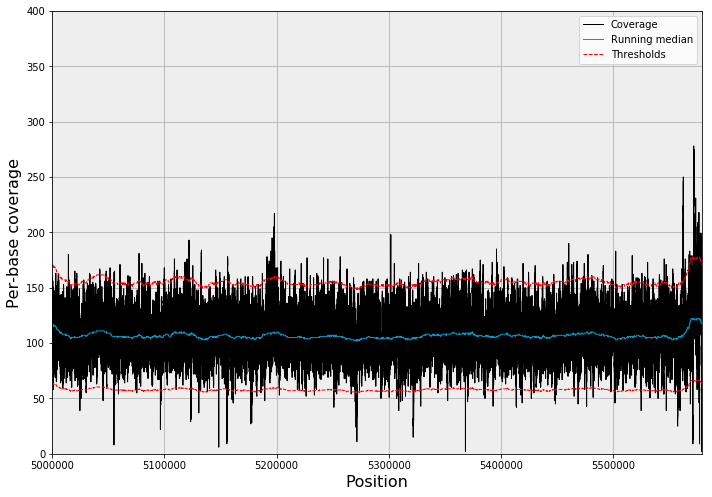

In [19]:
chrom = b.chr_list[0]
chrom.run(20001, circular=True)
chrom.plot_coverage()
_ = ylim([0, 400])

Computing 2D histogram. Please wait


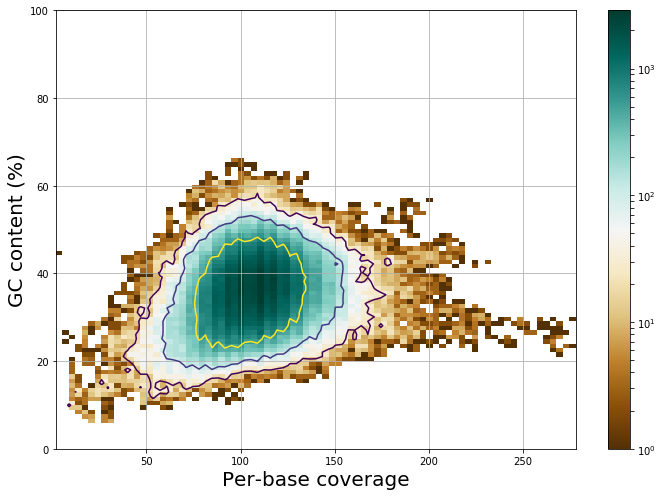

In [24]:
chrom.plot_gc_vs_coverage(bins=[80, 60], Nlevels=6)

# Sequana_coverage analysis (using the standalone)

In [25]:
!sequana_coverage --input S_pombe.filtered.bed --genbank S_pombe.gbk --reference S_pombe.fa

INFO    [sequana]:  Reading S_pombe.filtered.bed. This may take time depending on your input file
INFO    [sequana]:  Scanning input file (chunk of 5000000 rows)
 [-----------------100%-----------------] 2 of 2 complete in 3.1 sec
INFO    [sequana]:  Computing GC content
INFO    [sequana]:  There are 4 chromosomes/contigs.
INFO    [sequana]:      CU329670.1 (starting pos: 0, ending pos: 5579132)
INFO    [sequana]:      CU329671.1 (starting pos: 5579133, ending pos: 10118936)
INFO    [sequana]:      CU329672.1 (starting pos: 10118937, ending pos: 12571819)
INFO    [sequana]:      X54421.1 (starting pos: 12571820, ending pos: 12591250)
INFO    [sequana]:  ==================== analysing chrom/contig 1/4 (CU329670.1)
INFO    [sequana]:  Computing some metrics
INFO    [sequana]:  
Genome length:    5579133
!!!! Information based on a sample of 5000000 points
Sequencing depth (DOC):                     105.29 
Sequencing depth (median):                  105.00 
Breadth of coverage (BOC) (per

The previous cell should create a directory that contains a HTML file called multiqc_report.html, which can be browsed to look at the different chromosome and results.